In [2]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics
from matplotlib.patches import Rectangle
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import KFold
import warnings
warnings.filterwarnings('ignore')

C:\Users\SAM-PC\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.read_csv('E:\Courses\Sem3\Machine Learning\Assignment1\HW1_input.csv')

In [4]:
df.columns

Index(['Age', 'Sex', 'Chest Pain', 'BP', 'Cholestoral',
       'fasting blood sugar > 120', 'resting ECG', 'max hr', 'angina',
       'oldpeak', 'slope', 'major vessels', 'defect', 'heart disease'],
      dtype='object')

In [5]:
df.describe()

,Age,BP,Cholestoral,max hr,oldpeak,major vessels
count,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000
mean,54.433333,131.344444,249.659259,149.677778,1.05000,0.670370
std,9.109067,17.861608,51.686237,23.165717,1.14521,0.943896
min,29.000000,94.000000,126.000000,71.000000,0.00000,0.000000
25%,48.000000,120.000000,213.000000,133.000000,0.00000,0.000000
50%,55.000000,130.000000,245.000000,153.500000,0.80000,0.000000
75%,61.000000,140.000000,280.000000,166.000000,1.60000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.20000,3.000000


In [6]:
df['Sex'].value_counts()

Female    183
Male       87
Name: Sex, dtype: int64

In [7]:
df['Chest Pain'].value_counts()

Abnormal        129
Asymptomatic     79
Angina           42
None             20
Name: Chest Pain, dtype: int64

In [8]:
df['fasting blood sugar > 120'].value_counts()

No     230
Yes     40
Name: fasting blood sugar > 120, dtype: int64

In [9]:
df['resting ECG'].value_counts()

 hyper    137
norm      131
abnorm      2
Name: resting ECG, dtype: int64

In [10]:
df['angina'].value_counts()

No     181
Yes     89
Name: angina, dtype: int64

In [11]:
df['slope'].value_counts()

Up      130
Flat    122
Down     18
Name: slope, dtype: int64

In [12]:
df['defect'].value_counts()

Normal               152
reversible Defect    104
Fixed Defect          14
Name: defect, dtype: int64

In [13]:
df['heart disease'].value_counts()

No     150
Yes    120
Name: heart disease, dtype: int64

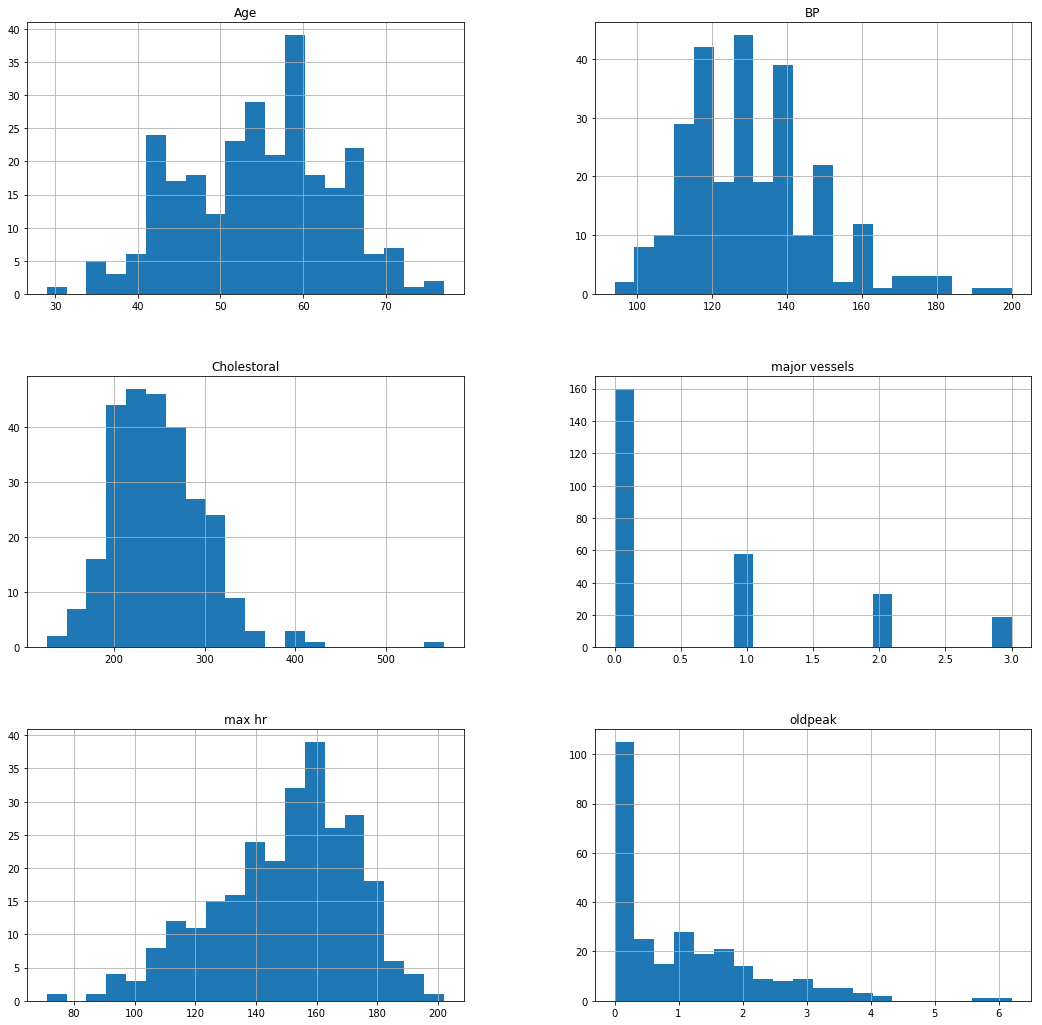

In [14]:
#Plotting Histograms of All Non-Categorical Features
fig1 = plt.figure(figsize=(18,18))
axis = fig1.gca()
df.hist(ax = axis, bins = 20)
plt.show()

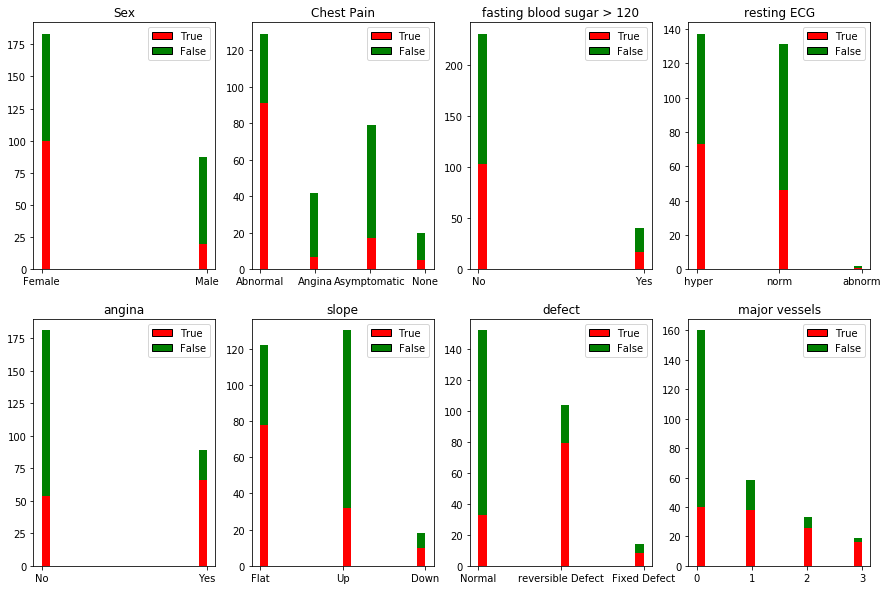

In [15]:
#Plotting Stacked Histograms of Discrete Variables
def stackHist(vec, df_pos, df_neg):
    plt.figure(figsize=(15,10))
    i = 1
    for v in vec:
        plt.subplot(2,4,i)
        plt.title(v)
        plt.hist([df_pos[v], df_neg[v]], bins = 20, stacked = True, color = ['r','g'])
        handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['r','g']]
        labels = ["True", "False"]
        plt.legend(handles, labels)
        i += 1
    plt.show()
    return
df_pos = df.loc[df['heart disease'] == 'Yes']
df_neg = df.loc[df['heart disease'] == 'No']
stackHist(['Sex','Chest Pain','fasting blood sugar > 120','resting ECG','angina','slope','defect','major vessels'], df_pos, df_neg)

In [16]:
#Replacing Sex
sex = {'Male' : 0, 'Female' : 1}
df['Sex'] = [sex[item] for item in df['Sex']]

#Replacing Blood Sugar
fbs = {'No' : 0, 'Yes' : 1}
df['fasting blood sugar > 120'] = [fbs[item] for item in df['fasting blood sugar > 120']]

#Replacing Resting ECG
ecg = {'norm' : -1, 'abnorm' : 0, ' hyper': 1 }
df['resting ECG'] = [ecg[item] for item in df['resting ECG']]

#Replacing Angina
angina = {'No' : 0, 'Yes' : 1}
df['angina'] = [angina[item] for item in df['angina']]

#Replacing Slope
slope = {'Up' : 1, 'Flat' : 0, 'Down': -1 }
df['slope'] = [slope[item] for item in df['slope']]

#Replacing Heart Disease
heart_disease = {'No' : 0, 'Yes' : 1}
df['heart disease'] = [heart_disease[item] for item in df['heart disease']]

In [17]:
df.corr()

,Age,Sex,BP,Cholestoral,fasting blood sugar > 120,resting ECG,max hr,angina,oldpeak,slope,major vessels,heart disease
Age,1.000000,-0.094401,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,-0.159774,0.356081,0.212322
Sex,-0.094401,1.000000,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,-0.050545,0.086830,0.297721
BP,0.273053,-0.062693,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,-0.142472,0.085697,0.155383
Cholestoral,0.220056,-0.201647,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,0.005755,0.126541,0.118021
fasting blood sugar > 120,0.123458,0.042140,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,-0.044076,0.123774,-0.016319
resting ECG,0.128171,0.039253,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,-0.160614,0.114368,0.182091
max hr,-0.402215,-0.076101,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,0.386847,-0.265333,-0.418514
angina,0.098297,0.180022,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,-0.255908,0.153347,0.419303
oldpeak,0.194234,0.097412,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,-0.609712,0.255005,0.417967
slope,-0.159774,-0.050545,-0.142472,0.005755,-0.044076,-0.160614,0.386847,-0.255908,-0.609712,1.000000,-0.109498,-0.337616


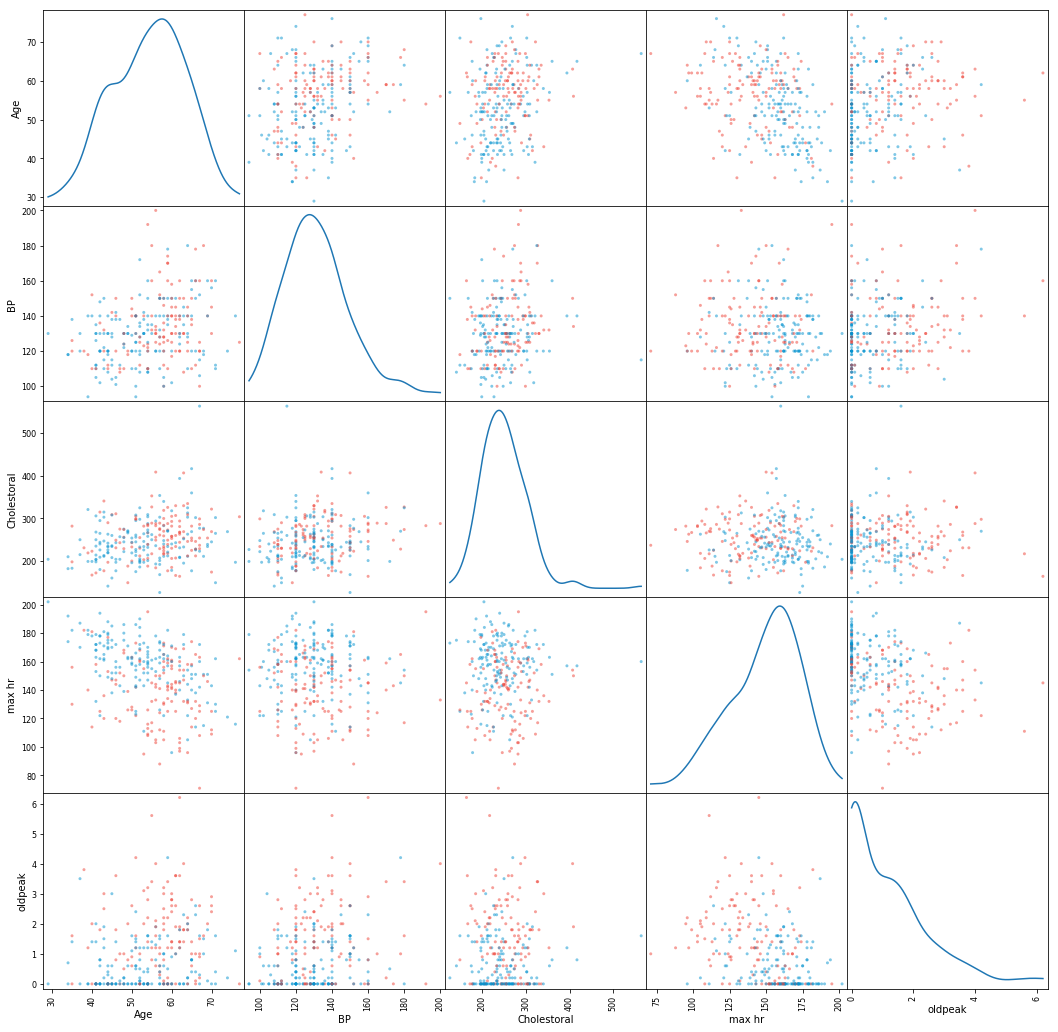

In [18]:
#Plotting Scatter Plots of Continuous Variables in Scatter Matrix
fig3 = plt.figure(figsize=(18,18))
axis = fig3.gca()
color_wheel = {1: "#0392cf", 2: "#ee4035"}
colors = df['heart disease'].map(lambda x: color_wheel.get(x + 1))
pd.tools.plotting.scatter_matrix(df[['Age','BP','Cholestoral','max hr','oldpeak']], ax = axis, color = colors, diagonal='kde')
plt.show()

In [19]:
#Hot Encoding for Non-Ordered Variables
temp = df['heart disease']
df.drop('heart disease', axis=1, inplace=True)

df = pd.concat([df, pd.get_dummies(df['Chest Pain'], prefix='Chest Pain')], axis=1)
df.drop('Chest Pain', axis=1, inplace=True)

df = pd.concat([df, pd.get_dummies(df['defect'], prefix='defect')], axis=1)
df.drop('defect', axis=1, inplace=True)

df = pd.concat([df, temp], axis=1)

In [30]:
#Function Plots the ROC Curve
def plotROC(y_pred, y_test):
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    auroc = metrics.auc(fpr, tpr)
    # Plot ROC
    plt.figure();
    plt.title('Receiver Operating Characteristics')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auroc)
    plt.legend(loc = 'best')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print("The AUROC is:", auroc)
    l_score_cal = scoreCalculation(y_pred, y_test, threshold)    
    return [auroc, l_score_cal]

#Function Returns the Accuracy, Precision, Recall & F1 Score Based on the Prediction
def scoreCalculation(y_pred, y_test, threshold):
    Max_F1_Score = 0
    Max_F1_Threshold = 0
    for i in threshold:
        #print("Output Prediction : \n", y_pred.describe())
        #print("Threshold =", i)
        y_out = [1 if x > i else 0 for x in y_pred]
    
        #All Scores
        TN, FP, FN, TP = confusion_matrix(y_test, y_out).ravel()
        Accuracy = (TP + TN)/(TP + TN + FP + FN)
        Precision = (TP)/(TP + FP)
        Recall = (TP)/(TP + FN)
        F1_Score = 2*(Precision * Recall) / (Precision + Recall)
        #print('Accuracy:', Accuracy, '\nPrecision:', Precision, '\nRecall:', Recall, '\nF1 Score:', F1_Score ,'\n')
        #print('F1 Score: ', F1_Score)
        if (Max_F1_Score < F1_Score):
            Opt_F1_Threshold = i
            Max_F1_Score = F1_Score
    print("The Optimum Threshold is", Opt_F1_Threshold, "for Max F1 Score as", Max_F1_Score)
    return Max_F1_Score

#Perform Logistic Regression
def linearRegression(train_df, test_df, lin_list):
    x = train_df.loc[:, df.columns.isin(lin_list)]
    x = sm.add_constant(x) #Adds a Constant
    model = sm.OLS(train_df.iloc[:,-1], x).fit() 
 
    return model

#Perform Logistic Regression
def logisticRegression(train_df, test_df, log_list):
    x = train_df.loc[:, df.columns.isin(log_list)]
    x = sm.add_constant(x) #Adds a Constant
    model = sm.Logit(train_df.iloc[:,-1], x).fit()
     
    return model

In [31]:
# 80/20 Split
df_rand = df
train_size = 0.80 * df_rand.shape[0]
train_df = df_rand[:int(train_size)]
test_df = df_rand[int(train_size):]

In [32]:
#Linear Modelling Summary
x = train_df.iloc[:,:-1]
x = sm.add_constant(x) #Adds a Constant
model = sm.OLS(train_df.iloc[:,-1], x).fit()
print(model.summary())

#Logistic Modelling Summary
x = train_df.iloc[:,:-1]
x = sm.add_constant(x) #Adds a Constant
model = sm.Logit(train_df.iloc[:,-1], x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          heart disease   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     15.85
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           1.42e-27
Time:                        17:43:37   Log-Likelihood:                -66.669
No. Observations:                 216   AIC:                             167.3
Df Residuals:                     199   BIC:                             224.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

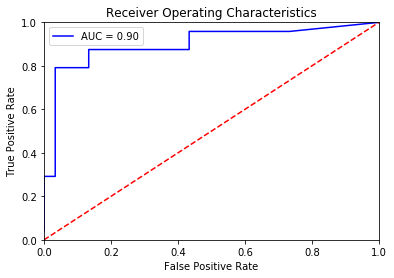

The AUROC is: 0.9
The Optimum Threshold is 0.342908598788742 for Max F1 Score as 0.8571428571428572
The Feature Selection of the Optimised Linear Model is ['oldpeak', 'major vessels', 'Chest Pain_Abnormal', 'defect_reversible Defect']


In [33]:
def linear_model_optimizer(train_df, test_df, lin_list, i):
    lin_list.append(i)
    linear_model = linearRegression(train_df, test_df, lin_list)
    for i in lin_list:
        if (linear_model.pvalues[i] > 0.01):
            lin_list.remove(i)
    #print(lin_list)
    linear_model = linearRegression(train_df, test_df, lin_list)
    
    return linear_model

# Forward Backward (Mixed) Selection Pass:
def best_fit_linear_model(train_df, test_df):
    lin_list = []
    for i in list(train_df.columns.values):
        if(i == 'heart disease'):
            break
        linear_model = linear_model_optimizer(train_df, test_df, lin_list, i)

    #Model Check
    x = test_df.iloc[:,df.columns.isin(lin_list)]
    x = sm.add_constant(x) #Adds Constant

    #Prediction on the Testing Data
    y_pred = linear_model.predict(x)
    
    #Calculating Scores
    roc_fscore = plotROC(y_pred, test_df.iloc[:,-1])
    #print(roc_fscore)
    print("The Feature Selection of the Optimised Linear Model is", lin_list)
    
    return roc_fscore
# 80/20 Split
model = best_fit_linear_model(train_df, test_df)

Optimization terminated successfully.
         Current function value: 0.667332
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.667332
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598444
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.598444
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.580847
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.580847
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.570933
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607064
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606371
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607064
  

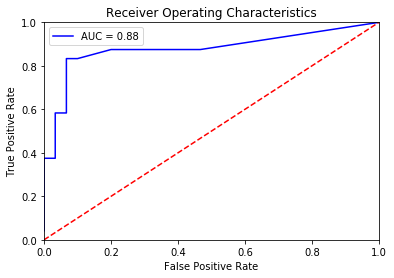

The AUROC is: 0.8784722222222222
The Optimum Threshold is 0.36491209452987045 for Max F1 Score as 0.8695652173913043
The Feature Selection of the Optimised Logistic Model is ['angina', 'major vessels', 'Chest Pain_Abnormal', 'defect_reversible Defect']


In [34]:
def logistic_model_optimizer(train_df, test_df, log_list, i):
    log_list.append(i)
    logistic_model = logisticRegression(train_df, test_df, log_list)
    for i in log_list:
        if (logistic_model.pvalues[i] > 0.01):
            log_list.remove(i)
    #print(log_list)
    logistic_model = logisticRegression(train_df, test_df, log_list)
    
    return logistic_model

# Forward Backward (Mixed) Selection Pass:
def best_fit_logistic_model(train_df, test_df):
    log_list = []
    logisticRegression.counter = 0
    for i in list(train_df.columns.values):
        if(i == 'heart disease'):
            break
        logistic_model = logistic_model_optimizer(train_df, test_df, log_list, i)
           
    #Model Check
    x = test_df.iloc[:,df.columns.isin(log_list)]
    x = sm.add_constant(x) #Adds Constant

    #Prediction on the Testing Data
    y_pred = logistic_model.predict(x)
    
    #Calculating Scores
    roc_fscore = plotROC(y_pred, test_df.iloc[:,-1])
    #print(roc_fscore)
    print("The Feature Selection of the Optimised Logistic Model is", log_list)
    
    return roc_fscore
# 80/20 Split
model = best_fit_logistic_model(train_df, test_df) 

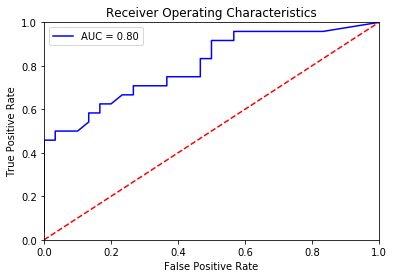

The AUROC is: 0.8034722222222223
The Optimum Threshold is 0.1557373636058349 for Max F1 Score as 0.7096774193548387
The Feature Selection of the Optimised Linear Model is ['oldpeak', 'major vessels', 'Chest Pain_Abnormal', 'defect_reversible Defect']
Optimization terminated successfully.
         Current function value: 0.654580
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.654580
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607072
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607072
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603451
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607072
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.592529
         Iterations 6
Optimization terminated successfull

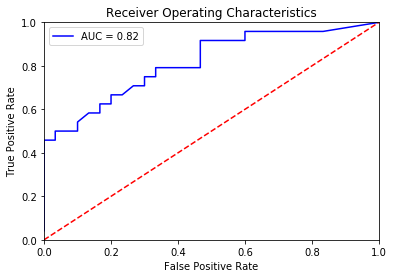

The AUROC is: 0.8159722222222223
The Optimum Threshold is 0.2797417000723604 for Max F1 Score as 0.7169811320754716
The Feature Selection of the Optimised Logistic Model is ['oldpeak', 'major vessels', 'Chest Pain_Abnormal', 'defect_reversible Defect']


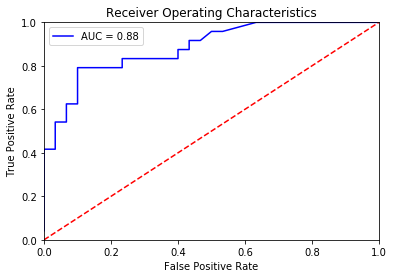

The AUROC is: 0.8847222222222223
The Optimum Threshold is 0.5227386758010043 for Max F1 Score as 0.7999999999999999
The Feature Selection of the Optimised Linear Model is ['Sex', 'angina', 'oldpeak', 'major vessels', 'Chest Pain_Abnormal', 'defect_reversible Defect']
Optimization terminated successfully.
         Current function value: 0.657325
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.657325
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593753
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.593753
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.583001
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.593753
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586865
         Iterations 6
Optimization termi

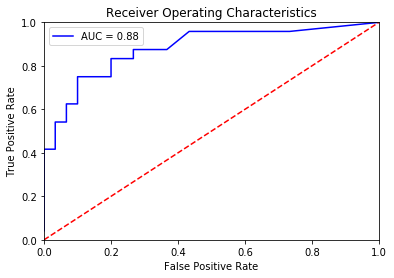

The AUROC is: 0.8805555555555556
The Optimum Threshold is 0.21119656723176308 for Max F1 Score as 0.7843137254901961
The Feature Selection of the Optimised Logistic Model is ['oldpeak', 'major vessels', 'Chest Pain_Abnormal', 'defect_reversible Defect']


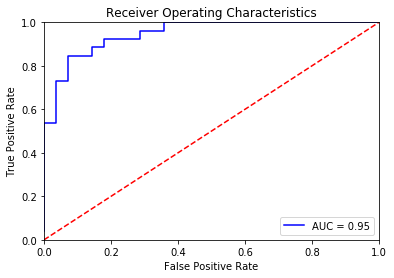

The AUROC is: 0.9478021978021979
The Optimum Threshold is 0.41695572168867756 for Max F1 Score as 0.8679245283018868
The Feature Selection of the Optimised Linear Model is ['Sex', 'max hr', 'oldpeak', 'major vessels', 'Chest Pain_Abnormal', 'defect_reversible Defect']
Optimization terminated successfully.
         Current function value: 0.664969
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664969
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.610866
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.610866
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605796
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610866
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593664
         Iterations 6
Optimization term

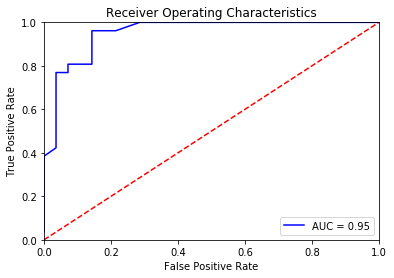

The AUROC is: 0.9526098901098902
The Optimum Threshold is 0.21712676226704808 for Max F1 Score as 0.8928571428571429
The Feature Selection of the Optimised Logistic Model is ['oldpeak', 'major vessels', 'Chest Pain_Abnormal', 'defect_reversible Defect']


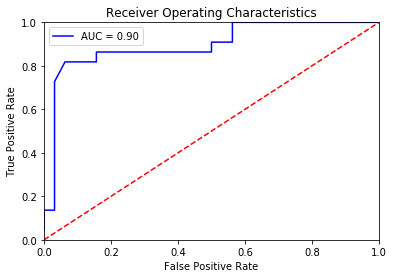

The AUROC is: 0.8963068181818183
The Optimum Threshold is 0.42397992254837386 for Max F1 Score as 0.8260869565217391
The Feature Selection of the Optimised Linear Model is ['oldpeak', 'major vessels', 'Chest Pain_Abnormal', 'defect_reversible Defect']
Optimization terminated successfully.
         Current function value: 0.672732
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.672732
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.619594
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.619594
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.612980
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.619594
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.608040
         Iterations 6
Optimization terminated successful

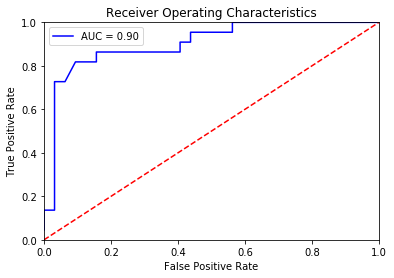

The AUROC is: 0.9034090909090909
The Optimum Threshold is 0.3869040302150079 for Max F1 Score as 0.8260869565217391
The Feature Selection of the Optimised Logistic Model is ['oldpeak', 'major vessels', 'Chest Pain_Abnormal', 'defect_reversible Defect']


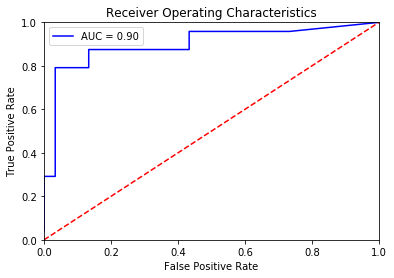

The AUROC is: 0.9
The Optimum Threshold is 0.342908598788742 for Max F1 Score as 0.8571428571428572
The Feature Selection of the Optimised Linear Model is ['oldpeak', 'major vessels', 'Chest Pain_Abnormal', 'defect_reversible Defect']
Optimization terminated successfully.
         Current function value: 0.667332
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.667332
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598444
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.598444
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.580847
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.580847
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.570933
         Iterations 6
Optimization terminated successfully.
         Curr

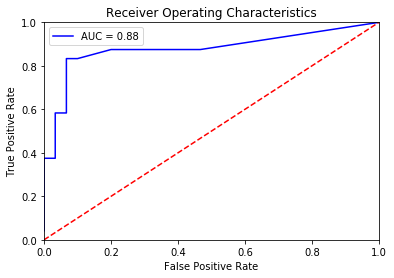

The AUROC is: 0.8784722222222222
The Optimum Threshold is 0.36491209452987045 for Max F1 Score as 0.8695652173913043
The Feature Selection of the Optimised Logistic Model is ['angina', 'major vessels', 'Chest Pain_Abnormal', 'defect_reversible Defect']


In [35]:
# 5-Fold Cross Validation
l_auroc_lin = []
l_score_lin = []
l_auroc_log = []
l_score_log = []
kf = KFold(len(df),5)
for train_indices, test_indices in kf:
    #print(train_indices)
    #print(test_indices)
    train_df = df.loc[train_indices]
    test_df = df.loc[test_indices]
    #print(train_df.shape)
    #print(test_df.shape)
    roc_fscore1 = best_fit_linear_model(train_df, test_df)
    l_auroc_lin.append(roc_fscore1[0])
    l_score_lin.append(roc_fscore1[1])
    roc_fscore2 = best_fit_logistic_model(train_df, test_df)
    l_auroc_log.append(roc_fscore2[0])
    l_score_log.append(roc_fscore2[1])
#print(l_auroc_lin)
#print(l_score_lin)
#print(l_auroc_log)
#print(l_score_log)

In [26]:
def mean_confidence_interval(data, confidence = 0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return [m, m-h, m+h]

In [27]:
lin_auroc = mean_confidence_interval(l_auroc_lin, 0.95)
print("Mean of the AUROCs of Linear Model:", lin_auroc[0])
print("Confidence Interval Lower Bound of the AUROCs of Linear Model:", lin_auroc[1])
print("Confidence Interval Lower Bound of the AUROCs of Linear Model:", lin_auroc[2])
log_auroc = mean_confidence_interval(l_auroc_log, 0.95)
print("Mean of the AUROCs of Logistic Model:", log_auroc[0])
print("Confidence Interval Lower Bound of the AUROCs of Logistic Model:", log_auroc[1])
print("Confidence Interval Lower Bound of the AUROCs of Logistic Model:", log_auroc[2])
lin_score = mean_confidence_interval(l_score_lin, 0.95)
print("Mean of the F1 Scores of Linear Model:", lin_score[0])
print("Confidence Interval Lower Bound of the AUROCs of Linear Model:", lin_score[1])
print("Confidence Interval Lower Bound of the AUROCs of Linear Model:", lin_score[2])
log_score = mean_confidence_interval(l_score_log, 0.95)
print("Mean of the F1 Scores of Logistic Model:", log_score[0])
print("Confidence Interval Lower Bound of the AUROCs of Logistic Model:", log_score[1])
print("Confidence Interval Lower Bound of the AUROCs of Logistic Model:", log_score[2])

Mean of the AUROCs of Linear Model: 0.8864606920856921
Confidence Interval Lower Bound of the AUROCs of Linear Model: 0.8215454467570331
Confidence Interval Lower Bound of the AUROCs of Linear Model: 0.9513759374143511
Mean of the AUROCs of Logistic Model: 0.8862037962037961
Confidence Interval Lower Bound of the AUROCs of Logistic Model: 0.8249646265977543
Confidence Interval Lower Bound of the AUROCs of Logistic Model: 0.9474429658098379
Mean of the F1 Scores of Linear Model: 0.4060831761321323
Confidence Interval Lower Bound of the AUROCs of Linear Model: 0.36684575279481224
Confidence Interval Lower Bound of the AUROCs of Linear Model: 0.44532059946945235
Mean of the F1 Scores of Logistic Model: 0.40898041743358543
Confidence Interval Lower Bound of the AUROCs of Logistic Model: 0.3654473745851148
Confidence Interval Lower Bound of the AUROCs of Logistic Model: 0.4525134602820561
